In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import scipy.integrate as spi
import scipy.stats as stats
import numpy as np
import seaborn as sns
from scipy import optimize
import emcee
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Markov Chain Monte-Carlo

Text(0, 0.5, 'Theta')

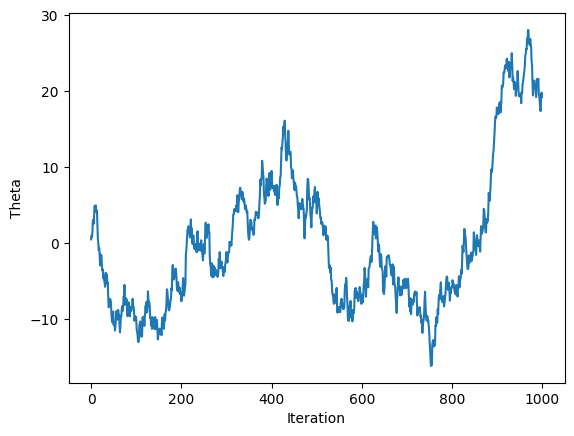

In [15]:
# Set random seed
np.random.seed(42)


#Set initial conditions
sigma = 1 # Assume sigma doesn't change

# Length of chain
N=1000

# Initial theta
theta_init = 0.5 #stats.norm.rvs(loc=0.5, scale=sigma, size=1)

theta_array = np.zeros(N)
theta_array[0] = theta_init

for t in np.arange(1,1000):
  theta_array[t] = stats.norm.rvs(loc=theta_array[t-1], scale=sigma)

plt.plot(theta_array)
plt.xlabel("Iteration")
plt.ylabel("Theta")


<Axes: ylabel='Count'>

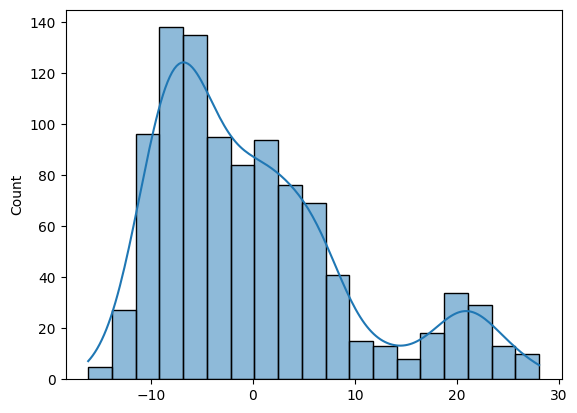

In [17]:
sns.histplot(theta_array, stat='count', kde=True)
#

Metropolis-Hastings

In [53]:
def metropolis_hastings(theta_new, theta):
  r = posterior_cointoss(theta_new) / posterior_cointoss(theta)
  theta_out = theta
  if r > 1:
    theta_out=theta_new
  elif r <=1:
    alpha=np.min([r,1])
    u = stats.uniform().rvs(1)
    if u<alpha:
      theta_out=theta_new
    else:
      theta_out=theta
  return theta_out

def posterior_cointoss(theta):
  n, k = 8, 5
  a, b = 1,1 # flat prior
  posterior = stats.beta.pdf(theta, k + a, n - k + b)
  return posterior


Text(0, 0.5, 'Theta')

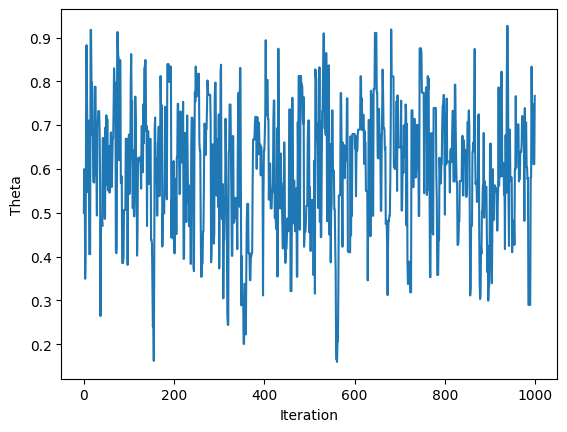

In [54]:
# Set random seed
np.random.seed(42)

# Length of chain
N=1000

# Initial theta
theta_init = 0.5 #stats.norm.rvs(loc=0.5, scale=sigma, size=1)
sigma = 0.2 # Assume sigma doesn't change

theta_array = np.zeros(N)
theta_array[0] = theta_init

for t in np.arange(1,1000):
  # Corrected np.min and np.max to accept lists for comparison
  theta_new = np.clip(stats.norm.rvs(loc=theta_array[t-1], scale=sigma), 0, 1)
  theta_array[t] = metropolis_hastings(theta_new,theta_array[t-1])

plt.plot(theta_array)
plt.xlabel("Iteration")
plt.ylabel("Theta")

mean:  0.601268086916836
std:  0.14634169208378917


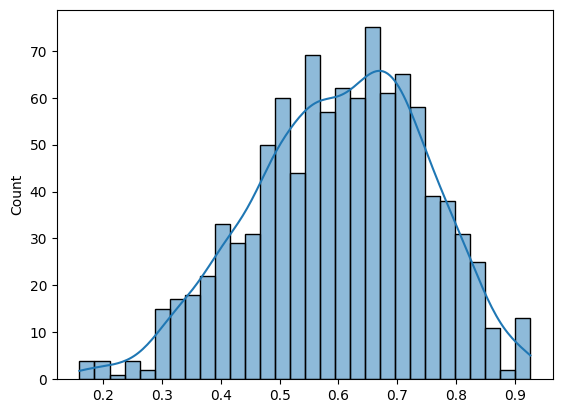

In [58]:
sns.histplot(theta_array, stat='count', kde=True, bins=30)
print('mean: ', theta_array.mean())
print('std: ', theta_array.std())
#